In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<AxesSubplot:xlabel='category', ylabel='count'>

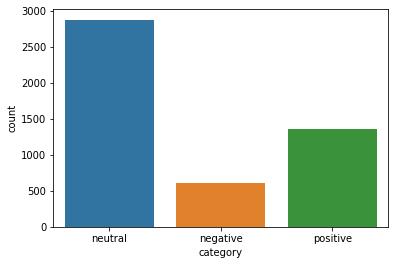

In [2]:
tweet_df = pd.read_csv('finalNews.csv', sep=',', encoding='latin-1')
tweet_df.head()
tweet_df.columns = ['category','comment']
sns.countplot(x="category",data=tweet_df)

In [3]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['comment'] = tweet_df['comment'].apply(lambda x: remove_punct(x))

import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweet_df["text_wo_stop"] = tweet_df["comment"].apply(lambda text: remove_stopwords(text))

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
tweet_df["text_stemmed"] = tweet_df["text_wo_stop"].apply(lambda text: stem_words(text))

from collections import Counter
cnt = Counter()
for text in tweet_df["text_stemmed"].values:
    for word in text.split():
        cnt[word] += 1
        
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweet_df["text__stopfreq"] = tweet_df["text_stemmed"].apply(lambda text: remove_freqwords(text))

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweet_df["text_lemmatized"] = tweet_df["text__stopfreq"].apply(lambda text: lemmatize_words(text))

tweet_df=tweet_df.drop(["text_stemmed","text__stopfreq"],axis=1)

from sklearn.preprocessing import LabelEncoder
tweet_df['encoded_category'] = LabelEncoder().fit_transform(tweet_df['category'])
tweet_df[["category", "encoded_category"]] 

def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

tweet_df=tweet_df.drop(["category","text_wo_stop"],axis=1)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
tweet_df.head()

,comment,text_lemmatized,encoded_category
0,According to Gran the company has no plans to...,accord gran plan move product russia although ...,1
1,Technopolis plans to develop in stages an area...,technopoli plan develop stage area less squar ...,1
2,The international electronic industry company ...,intern electron industri elcoteq lay ten emplo...,0
3,With the new production plant the company woul...,with new product plant would increas capac mee...,2
4,According to the company s updated strategy fo...,accord updat strategi year baswar target longt...,2


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report



In [25]:
def batch_selector(dataset,samples_no):
    training_batch=dataset.iloc[:samples_no]
    unlabelled_batch=dataset.iloc[samples_no:]
    return training_batch, unlabelled_batch

In [26]:
encoded_dict  = {'negtive':0,'neutral':1,'positive':2}

In [27]:
df_surprise=tweet_df[tweet_df['encoded_category']==0]
df_fear    =tweet_df[tweet_df['encoded_category']==1]
df_joy     =tweet_df[tweet_df['encoded_category']==2]


print(f'positive:{df_joy.shape}')
print(f'neutral:{df_fear.shape}')
print(f'negative:{df_surprise.shape}')

positive:(1363, 3)
neutral:(2879, 3)
negative:(604, 3)


In [9]:
No_samples=100
surprise_train,surprise_test=batch_selector(df_surprise,No_samples)
fear_train,fear_test=batch_selector(df_fear,No_samples)
joy_train,joy_test=batch_selector(df_joy,No_samples)


test250 = pd.concat([surprise_test,fear_test,joy_test], axis = 0)
train250= pd.concat([surprise_train,fear_train,joy_train], axis = 0)


pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe1.fit(train250.text_lemmatized, train250.encoded_category)
prediction = model.predict(test250.text_lemmatized)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(test250.encoded_category, prediction)*100,2)))
print(confusion_matrix(test250.encoded_category, prediction))
print(classification_report(test250.encoded_category, prediction))

MODEL - LINEAR SVC
accuracy score: 51.91%
[[ 280   90  134]
 [ 689 1677  413]
 [ 348  512  403]]
              precision    recall  f1-score   support

           0       0.21      0.56      0.31       504
           1       0.74      0.60      0.66      2779
           2       0.42      0.32      0.36      1263

    accuracy                           0.52      4546
   macro avg       0.46      0.49      0.44      4546
weighted avg       0.59      0.52      0.54      4546



In [28]:
#model.predict_proba(test250.text_lemmatized)
from sklearn.calibration import CalibratedClassifierCV
linear_svc = LinearSVC()     #The base estimator

# This is the calibrated classifier which can give probabilistic classifier
calibrated_svc = CalibratedClassifierCV(linear_svc,
                                        method='sigmoid',  #sigmoid will use Platt's scaling. Refer to documentation for other methods.
                                        cv=3) 
pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', calibrated_svc)])
model2 = pipe2.fit(train250.text_lemmatized, train250.encoded_category)
prediction = model2.predict_proba(test250.text_lemmatized)


In [11]:
prediction.shape

(4546, 3)

In [12]:
def num_sim(n1, n2):
  """ calculates a similarity score between 2 numbers """
  return 1 - abs(n1 - n2) / (n1 + n2)

def maxConflictFinder(array):
    a_list = list(array)
    are= list(array)
    max_value = max(a_list)
    max_index = a_list.index(max_value)
    maxele=a_list.pop(max_index)
    for i in range(len(a_list)):
        intdiff=num_sim(a_list[i],maxele)
        if((intdiff>0.90)):
            return are.index(a_list[i]),are.index(maxele)
        else:
            return None
        
        


In [13]:
lis=[]
lis3=[]
for i in prediction:
    if (maxConflictFinder(i) != None):
        lis.append(maxConflictFinder(i))
        lis3.append(i)
        

In [14]:
len(lis)

557

In [15]:
len(lis3)

557

In [16]:
len(lis)

557

In [17]:
test250


,comment,text_lemmatized,encoded_category
3340,The reduction notice applied to people,reduct notic appli peopl,0
3491,March A leakage in the gypsum pond was detec...,march a leakag gypsum pond detect today talviv...,0
3498,A total of jobs will be reduced at the Raahe ...,a total job reduc raah steel work,0
3534,As a result some persons will no longer be ne...,a result person long need,0
3543,Biohit said that it will reduce the number of ...,biohit reduc number leas personnel lay personnel,0
...,...,...,...
4775,The apartment block will be welllocated in ea...,apart block wellloc easi reach citi center clo...,2
4780,The antibody given at repeated doses of up to...,antibodi give repeat dose mgkg gener well tole...,2
4786,Danske Bank AS DANSKE DC jumped percent to k...,dansk bank a dansk dc jump percent krone rebou...,2
4787,Our superior customer centricity and expertise...,our superior custom centric expertis digit ser...,2


In [18]:
k=[35,25,70,10,65,6]
a_list = list(k)
are= list(k)
max_value = max(a_list)
max_index = a_list.index(max_value)
maxele=a_list.pop(max_index)
for i in range(len(a_list)):
    intdiff=num_sim(a_list[i],maxele)
    if((intdiff>0.90)):
        print(are.index(a_list[i]),intdiff)
        print(a_list[i])
print(a_list)

4 0.962962962962963
65
[35, 25, 10, 65, 6]


In [19]:
a_list,are

([35, 25, 10, 65, 6], [35, 25, 70, 10, 65, 6])

In [20]:
def indexGenerator(df):
    n,_=df.shape
    index=np.arange(0,n)
    df['index']=index
    df=df.set_index('index')
    return df

In [21]:
test250=indexGenerator(test250)
test250

,comment,text_lemmatized,encoded_category
index,,,
0,The reduction notice applied to people,reduct notic appli peopl,0
1,March A leakage in the gypsum pond was detec...,march a leakag gypsum pond detect today talviv...,0
2,A total of jobs will be reduced at the Raahe ...,a total job reduc raah steel work,0
3,As a result some persons will no longer be ne...,a result person long need,0
4,Biohit said that it will reduce the number of ...,biohit reduc number leas personnel lay personnel,0
...,...,...,...
4541,The apartment block will be welllocated in ea...,apart block wellloc easi reach citi center clo...,2
4542,The antibody given at repeated doses of up to...,antibodi give repeat dose mgkg gener well tole...,2
4543,Danske Bank AS DANSKE DC jumped percent to k...,dansk bank a dansk dc jump percent krone rebou...,2


In [62]:
pred=model2.predict_proba(test250.text_lemmatized[0:1])


In [63]:
def dataTx(n,df_test,df_train):
    df_train=df_train.append(df_test[n:n+1])
    df_test=df_test.drop(n)
    return df_test,df_train
df1,df2=dataTx(3,test250,train250)

In [64]:
test250.shape,train250.shape

((4546, 3), (300, 3))

In [65]:
df1,df2=dataTx(3,test250,train250)

In [66]:
df1.shape,df2.shape

((4545, 3), (301, 3))

# active learning creation

In [67]:
df_test,df_train=test250,train250

In [68]:
pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', calibrated_svc)])

model2 = pipe2.fit(df_train.text_lemmatized, df_train.encoded_category)
all_prediction = model2.predict_proba(df_test.text_lemmatized)


ine,_=all_prediction.shape

lis=[]
lis3=[]
for i in range(ine):
    if (maxConflictFinder(all_prediction[i]) != None):
        lis.append(maxConflictFinder(all_prediction[i]))
        lis3.append(i)
        
print(len(lis3))

print("test shape",df_test.shape,"train shape",df_train.shape) 

df_test=indexGenerator(df_test)
df_train=indexGenerator(df_train)

for i in lis3:
    df_test,df_train=dataTx(i,df_test,df_train)
    
df_test=indexGenerator(df_test)
df_train=indexGenerator(df_train)

print("new test shape",df_test.shape,"new train shape",df_train.shape) 


pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
prediction = model.predict(df_test.text_lemmatized)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
print(confusion_matrix(df_test.encoded_category, prediction))
print(classification_report(df_test.encoded_category, prediction))

557
test shape (4546, 3) train shape (300, 3)
new test shape (3989, 3) new train shape (799, 3)
MODEL - LINEAR SVC
accuracy score: 71.95%
[[ 228  149   78]
 [  88 2135  167]
 [  84  553  507]]
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       455
           1       0.75      0.89      0.82      2390
           2       0.67      0.44      0.53      1144

    accuracy                           0.72      3989
   macro avg       0.67      0.61      0.63      3989
weighted avg       0.71      0.72      0.70      3989



In [69]:
pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
prediction = model.predict(df_test.text_lemmatized)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
print(confusion_matrix(df_test.encoded_category, prediction))
print(classification_report(df_test.encoded_category, prediction))

MODEL - LINEAR SVC
accuracy score: 71.95%
[[ 228  149   78]
 [  88 2135  167]
 [  84  553  507]]
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       455
           1       0.75      0.89      0.82      2390
           2       0.67      0.44      0.53      1144

    accuracy                           0.72      3989
   macro avg       0.67      0.61      0.63      3989
weighted avg       0.71      0.72      0.70      3989



In [32]:
df_surprise=tweet_df[tweet_df['encoded_category']==0]
df_fear    =tweet_df[tweet_df['encoded_category']==1]
df_joy     =tweet_df[tweet_df['encoded_category']==2]


print(f'positive:{df_joy.shape}')
print(f'neutral:{df_fear.shape}')
print(f'negative:{df_surprise.shape}')

positive:(1363, 3)
neutral:(2879, 3)
negative:(604, 3)


In [37]:
df_test,df_train=test250,train250
no_conflict_elements=[]
accuracy_list=[]

In [38]:
tweet_df.shape
x_train,x_test,y_train,y_test = train_test_split(tweet_df.text_lemmatized,tweet_df.encoded_category,test_size = 0.20 , random_state = 0,stratify=tweet_df.encoded_category)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("number of training samples :",)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

number of training samples :
MODEL - LINEAR SVC
accuracy score: 74.64%
[[ 59  42  20]
 [ 16 502  58]
 [ 11  99 163]]
              precision    recall  f1-score   support

           0       0.69      0.49      0.57       121
           1       0.78      0.87      0.82       576
           2       0.68      0.60      0.63       273

    accuracy                           0.75       970
   macro avg       0.71      0.65      0.68       970
weighted avg       0.74      0.75      0.74       970



In [39]:
def dataTx_trial(txlist,df_test1,df_train1):
    for n in txlist:
        df_train1=df_train1.append(indexGenerator((df_test1.iloc[n].to_frame()).transpose()))
    for k in txlist:
        df_test1=df_test1.drop(k)
    return df_test1,df_train1


In [40]:
for k in range(100):
    print("###############","ITERATION NO",k+1,"###############################")
    pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', calibrated_svc)])
    model2 = pipe2.fit(df_train.text_lemmatized, df_train.encoded_category)
    all_prediction = model2.predict_proba(df_test.text_lemmatized)
    ine,_=all_prediction.shape
    lis=[]
    lis3=[]
    for i in range(ine):
        if (maxConflictFinder(all_prediction[i]) != None):
            lis.append(maxConflictFinder(all_prediction[i]))
            lis3.append(i)
    print(len(lis3))
    no_conflict_elements.append(len(lis3))
    print("test shape",df_test.shape,"train shape",df_train.shape) 
    df_test=indexGenerator(df_test)
    df_train=indexGenerator(df_train)
    df_test,df_train=dataTx_trial(lis3,df_test,df_train)
    df_test=indexGenerator(df_test)
    df_train=indexGenerator(df_train)
    df_train['encoded_category']=df_train['encoded_category'].astype(int)
    print("new test shape",df_test.shape,"new train shape",df_train.shape)
    print("    ")
    df_surprise_al=df_train[df_train['encoded_category']==5]
    df_fear_al    =df_train[df_train['encoded_category']==1]
    df_joy_al     =df_train[df_train['encoded_category']==2]
    df_love_al    =df_train[df_train['encoded_category']==3]
    df_anger_al   =df_train[df_train['encoded_category']==0]
    df_sadness_al =df_train[df_train['encoded_category']==4]
    #print(f'sadness:{df_sadness_al.shape}')
    print(f'Negative:{df_anger_al.shape}')
    #print(f'love:{df_love_al.shape}')
    print(f'Positive:{df_joy_al.shape}')
    print(f'Neutral:{df_fear_al.shape}')
    #print(f'surprise:{df_surprise_al.shape}')
    pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', LinearSVC())])
    model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
    prediction = model.predict(df_test.text_lemmatized)
    print("    ")
    print("MODEL - LINEAR SVC")
    print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
    accuracy_list.append(format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
    print(confusion_matrix(df_test.encoded_category, prediction))
    print(classification_report(df_test.encoded_category, prediction))
    if(len(lis3)==0):
        break

############### ITERATION NO 1 ###############################
557
test shape (4546, 4) train shape (300, 4)
new test shape (3989, 3) new train shape (857, 3)
    
Negative:(149, 3)
Positive:(219, 3)
Neutral:(489, 3)
    
MODEL - LINEAR SVC
accuracy score: 67.91%
[[ 209  145  101]
 [ 108 2048  234]
 [ 105  587  452]]
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       455
           1       0.74      0.86      0.79      2390
           2       0.57      0.40      0.47      1144

    accuracy                           0.68      3989
   macro avg       0.60      0.57      0.58      3989
weighted avg       0.66      0.68      0.66      3989

############### ITERATION NO 2 ###############################
133
test shape (3989, 3) train shape (857, 3)
new test shape (3856, 3) new train shape (990, 3)
    
Negative:(193, 3)
Positive:(259, 3)
Neutral:(538, 3)
    
MODEL - LINEAR SVC
accuracy score: 69.48%
[[ 206  122   83]
 [  83 2016  242]


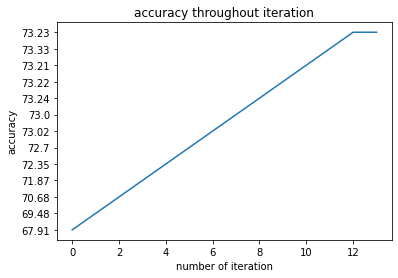

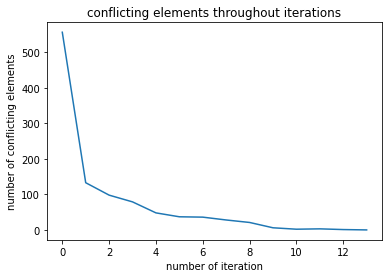

In [35]:
import matplotlib.pyplot as plt
# x axis values
x_axis=np.arange(0,len(no_conflict_elements))
# corresponding y axis values
y = accuracy_list
# plotting the points
plt.plot(x_axis, y)
# naming the x axis
plt.xlabel('number of iteration')
# naming the y axis
plt.ylabel('accuracy')
# giving a title to my graph
plt.title('accuracy throughout iteration')
# function to show the plot
plt.show()
y = no_conflict_elements
# plotting the points
plt.plot(x_axis, y)
# naming the x axis
plt.xlabel('number of iteration')
# naming the y axis
plt.ylabel('number of conflicting elements')
# giving a title to my graph
plt.title('conflicting elements throughout iterations')
# function to show the plot
plt.show()